In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [136]:
df = pd.read_csv("C:\\Users\\Al-arab\\Desktop\\softcode\\first task titanic\\Titanic-Dataset.csv")
df['intercept'] = 1

In [137]:
df = df.drop_duplicates()
df = df.dropna()

In [138]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df[['C', 'S', 'Q']] = pd.get_dummies(df['Embarked'], dtype = int)
df = df.drop('S' , axis = 1)
df_copy = df

In [139]:
# ------------------------- Survived DataFrame ----------------------------
df_survived = df_copy[df_copy["Survived"] == 1]
survived_Male = df_survived[df_survived["Sex"] == 1]
survived_Female = df_survived[df_survived["Sex"] == 0]

# ------------------------- Died DataFrame ----------------------------
df_died = df_copy[df_copy["Survived"] == 0]
died_Male   = df_died[df_died["Sex"] == 1]
died_Female = df_died[df_died["Sex"] == 0]

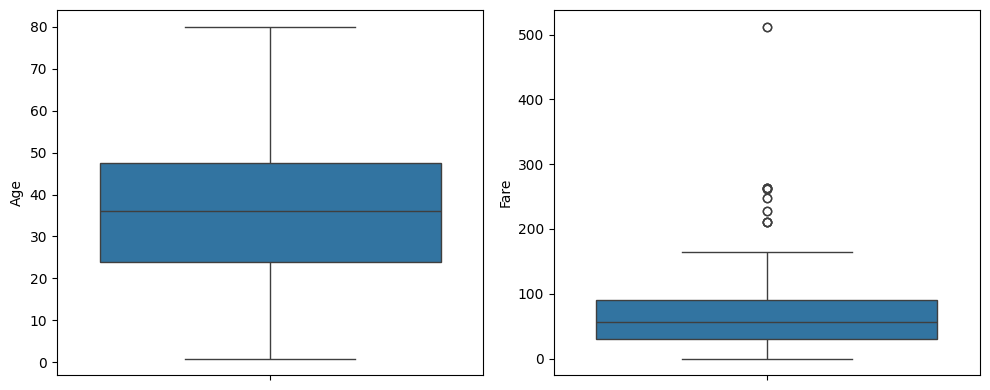

In [140]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sb.boxplot(y='Age', data=df)
plt.subplot(1, 2, 2)
sb.boxplot(y='Fare', data=df)
plt.tight_layout()
plt.show()

# ------------------------- DataFrame for Age and Fare ----------------------------

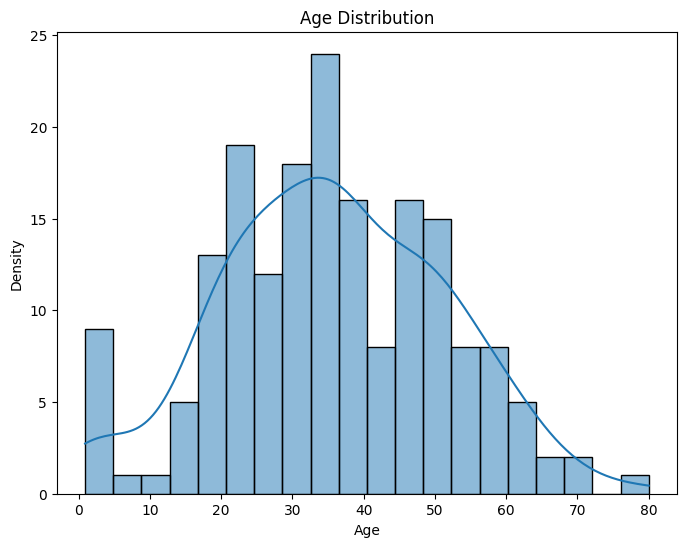

In [141]:
plt.figure(figsize=(8, 6))
sb.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()
#Most of the passengers are between 20 and 40 years old

Text(0.5, 1.0, 'Sex Ratio')

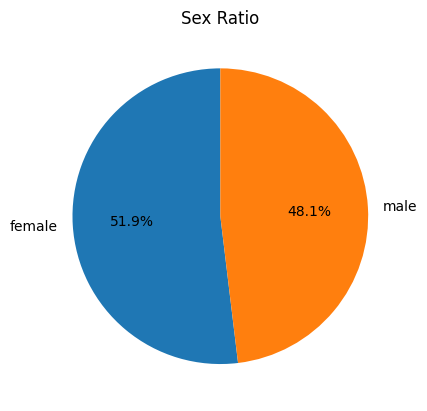

In [142]:
data = df["Sex"].value_counts()
data = data.rename({0:"female" , 1 :"male"})
data = data.reset_index()
data
plt.pie(data['Sex'], labels=data['index'], autopct='%1.1f%%', startangle=90)
plt.title('Sex Ratio')

### Cleaning Dataframe

## First Observation

### Hypothesis

$H_{0}: p_{Male} - p_{Female} >= 0$

$H_{1}: p_{Male} - p_{Female} < 0$

In [143]:
diffs = []
for _ in range (1000):
    male_percent = df.sample(500, replace=True)["Sex"].mean()
    female_percent = df.sample(500, replace=True)["Sex"].mean()
    diff = male_percent - female_percent
    diffs.append(diff)

Hypothesis = np.random.normal(0, np.std(diffs), size= 1000)

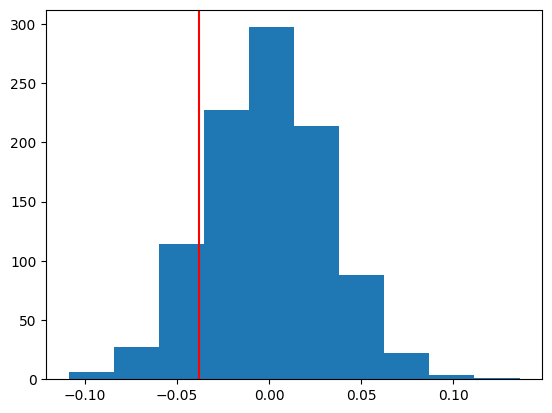

In [144]:
Male = np.mean(df["Sex"])
Female = 1 - Male
axv = Male - Female
plt.hist(Hypothesis);
plt.axvline(x= axv , color = 'r')
p_value = (np.array(diffs) >= axv).mean()
# Here we reject null hypothesis so Male < Female in survivation

$H_{0}: p_{Male} - p_{Female} >= 0$

$H_{1}: p_{Male} - p_{Female} < 0$

### Regression

In [145]:
X = df_copy[["intercept" , "Sex" ]]
Y = df_copy["Survived"]

In [146]:
model = sm.Logit(Y, X).fit()
print(model.summary())
# From this Sex is really important in determining the surviving

Optimization terminated successfully.
         Current function value: 0.474649
         Iterations 7
                            Logit Regression Results                           
Dep. Variable:                Survived   No. Observations:                  183
Model:                           Logit   Df Residuals:                      181
Method:                            MLE   Df Model:                            1
Date:              ?????, 11 ???? 2025   Pseudo R-squ.:                  0.2498
Time:                         23:18:16   Log-Likelihood:                -86.861
converged:                        True   LL-Null:                       -115.78
Covariance Type:             nonrobust   LLR p-value:                 2.855e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2754      0.207     -1.330      0.184      -0.681       0.131
Sex            2.8904

## Second Observation

### Regression

In [147]:
X = df_survived[["intercept" , "Age" ]]
Y = df_survived["Survived"]

In [148]:
model = sm.Logit(Y, X).fit();
print(model.summary());

# Age is not important factor in determing survivation

         Current function value: 0.000000
         Iterations: 35
                            Logit Regression Results                           
Dep. Variable:                Survived   No. Observations:                  123
Model:                           Logit   Df Residuals:                      121
Method:                            MLE   Df Model:                            1
Date:              ?????, 11 ???? 2025   Pseudo R-squ.:                     inf
Time:                         23:18:16   Log-Likelihood:            -9.8805e-10
converged:                       False   LL-Null:                        0.0000
Covariance Type:             nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     40.2687    4.5e+05   8.95e-05      1.000   -8.82e+05    8.82e+05
Age           -0.2434   5710.951  -4.26e-05      1.000   

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=

## Third observation

### Regression

In [149]:
X = df_survived[['C', 'Q']]
Y = df_survived["Survived"]

In [150]:
model = sm.Logit(Y, X).fit()
print(model.summary())
# Embarked is not really important especially of s and q compared to c

         Current function value: 0.005635
         Iterations: 35
                            Logit Regression Results                           
Dep. Variable:                Survived   No. Observations:                  123
Model:                           Logit   Df Residuals:                      121
Method:                            MLE   Df Model:                            1
Date:              ?????, 11 ???? 2025   Pseudo R-squ.:                     inf
Time:                         23:18:16   Log-Likelihood:               -0.69315
converged:                       False   LL-Null:                        0.0000
Covariance Type:             nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
C             24.4149   2.89e+04      0.001      0.999   -5.66e+04    5.67e+04
Q             27.4317   1.05e+05      0.000      1.000   

C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Al-arab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWa